In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data
from datetime import datetime


In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [16]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-13,189.479996,182.850006,187.710007,185.720001,57430600.0,183.529678
2019-05-14,189.699997,185.410004,186.410004,188.660004,36529700.0,186.434998
2019-05-15,191.750000,186.020004,186.270004,190.919998,26544700.0,188.668335
2019-05-16,192.470001,188.839996,189.910004,190.080002,33031400.0,187.838257
2019-05-17,190.899994,186.759995,186.929993,189.000000,32879100.0,186.770996


1. What was the change in price of the stock over time?

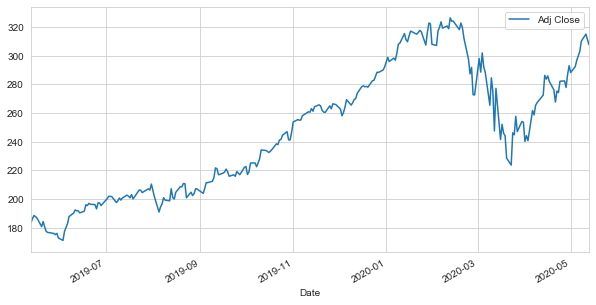

In [18]:
AAPL['Adj Close'].plot(kind = 'line',legend = True,figsize = (10,5))

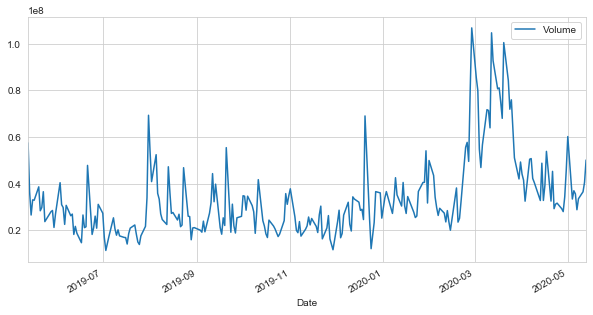

In [19]:
AAPL['Volume'].plot(kind = 'line',legend = True,figsize = (10,5))

3.) What was the moving average of the various stocks?

In [20]:
AAPL['MA for 10 days'] = pd.rolling_mean(AAPL['Adj Close'],10)              #why

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [26]:
AAPL['MA for 10 days'] = AAPL['Adj Close'].rolling(10).mean()

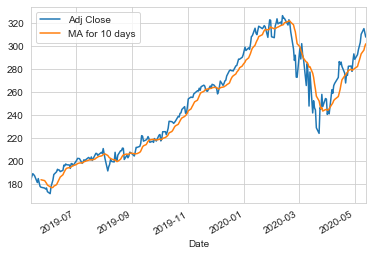

In [27]:
AAPL[['Adj Close','MA for 10 days']].plot()

In [77]:
ma_days = [20,30,50]
for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [78]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for %s days,MA for 20 days,MA for 30 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,
2019-05-13,189.479996,182.850006,187.710007,185.720001,57430600.0,183.529678,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-14,189.699997,185.410004,186.410004,188.660004,36529700.0,186.434998,NaN,NaN,NaN,NaN,NaN,0.015830
2019-05-15,191.750000,186.020004,186.270004,190.919998,26544700.0,188.668335,NaN,NaN,NaN,NaN,NaN,0.011979
2019-05-16,192.470001,188.839996,189.910004,190.080002,33031400.0,187.838257,NaN,NaN,NaN,NaN,NaN,-0.004400
2019-05-17,190.899994,186.759995,186.929993,189.000000,32879100.0,186.770996,NaN,NaN,NaN,NaN,NaN,-0.005682
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,305.170013,301.970001,303.220001,303.739990,28803800.0,302.919983,290.255286,269.768145,283.684572,273.245331,269.768145,0.010345
2020-05-08,310.350006,304.290009,305.640015,310.130005,33512000.0,310.130005,293.047678,270.515113,285.827747,274.991588,270.515113,0.023802
2020-05-11,317.049988,307.239990,308.100006,315.010010,36486600.0,315.010010,296.308124,271.362873,287.952631,277.256215,271.362873,0.015735


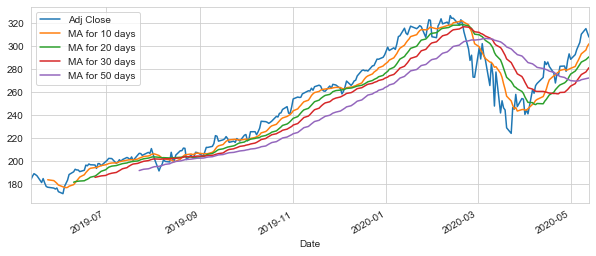

In [41]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days','MA for 50 days']].plot(figsize = (10,4),grid = True)

4.) What was the daily return?

In [ ]:
#Percentage change between the current and a prior element. ----> df.pct_changeb

In [5]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()


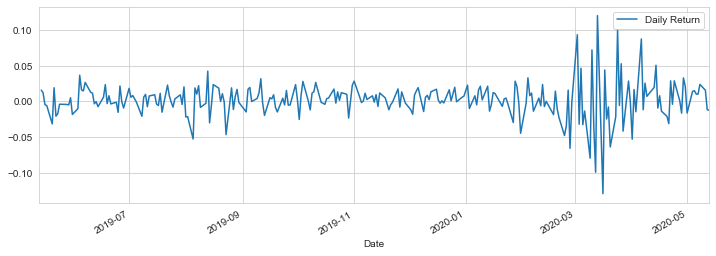

In [7]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True)

In [44]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for %s days,MA for 20 days,MA for 30 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,
2019-05-13,189.479996,182.850006,187.710007,185.720001,57430600.0,183.529678,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-14,189.699997,185.410004,186.410004,188.660004,36529700.0,186.434998,NaN,NaN,NaN,NaN,NaN,0.015830
2019-05-15,191.750000,186.020004,186.270004,190.919998,26544700.0,188.668335,NaN,NaN,NaN,NaN,NaN,0.011979
2019-05-16,192.470001,188.839996,189.910004,190.080002,33031400.0,187.838257,NaN,NaN,NaN,NaN,NaN,-0.004400
2019-05-17,190.899994,186.759995,186.929993,189.000000,32879100.0,186.770996,NaN,NaN,NaN,NaN,NaN,-0.005682


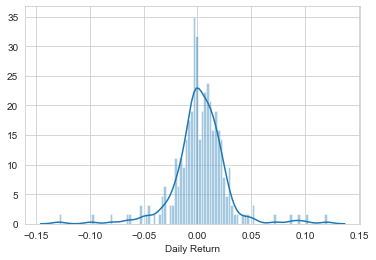

In [46]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

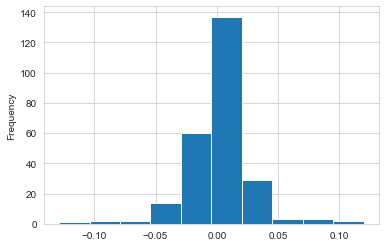

In [47]:
AAPL['Daily Return'].plot(kind = 'hist')

In [ ]:
#for analyzing all stocks we need adj close for all stocks

In [48]:
closing = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [49]:
closing.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-13,183.529678,1132.030029,121.739311,1822.680054
2019-05-14,186.434998,1120.439941,123.101303,1840.119995
2019-05-15,188.668335,1164.209961,124.834839,1871.150024
2019-05-16,187.838257,1178.979980,127.717468,1907.569946
2019-05-17,186.770996,1162.300049,126.865570,1869.000000


In [60]:
closing_chg = closing.pct_change()                 #closing_chg also called daily returns

In [ ]:
#to compare any two we can use jointplot

In [55]:
import scipy.stats as stats

In [ ]:
#value of p is important

F:\Ananconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


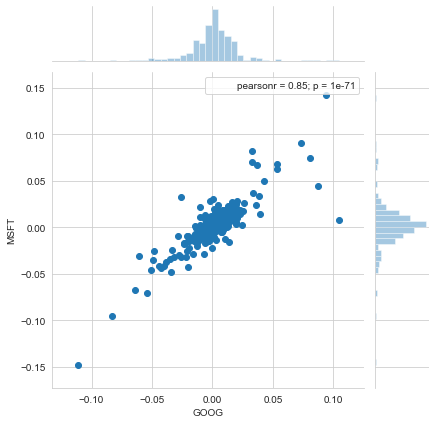

In [64]:
sns.jointplot('GOOG','MSFT',data = closing_chg.dropna()).annotate(stats.pearsonr)
plt.show()

4.) What was the correlation between different stocks' daily returns?

dialy return  =  adj close * perctange_change from the previus #understanding

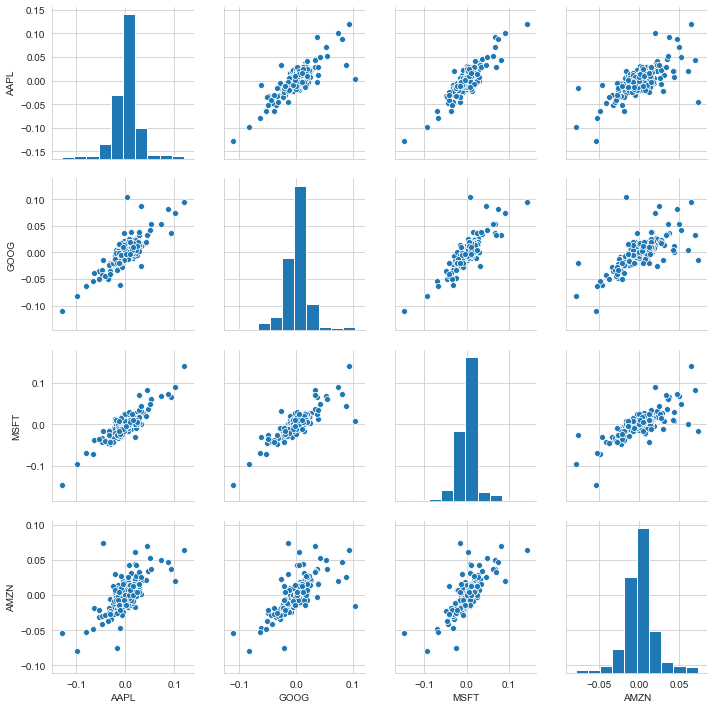

In [66]:
sns.pairplot(closing_chg.dropna(), palette='winter')

In [ ]:
#more customisation of pairplot saw on YouTube.  #which is PairGrid

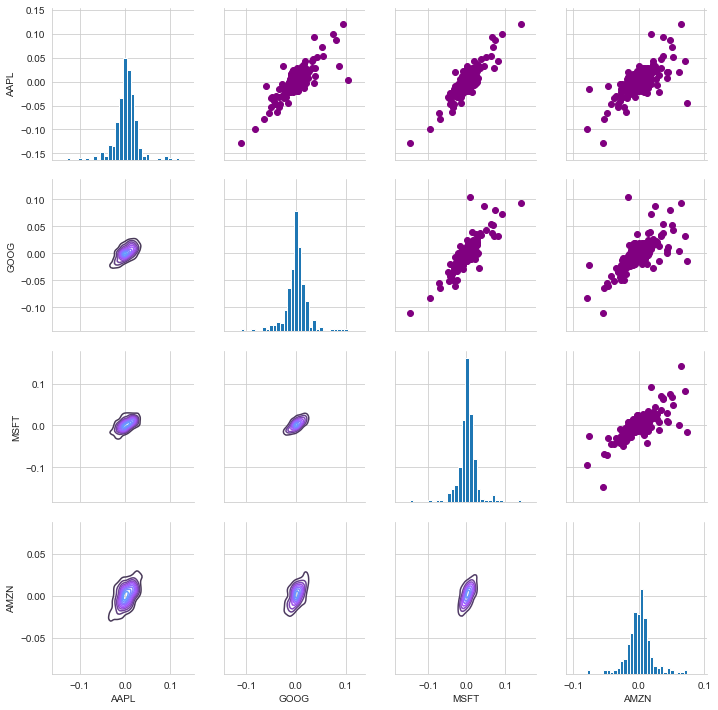

In [68]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_chg.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

5. What was the correlation between different stocks' closing prices?

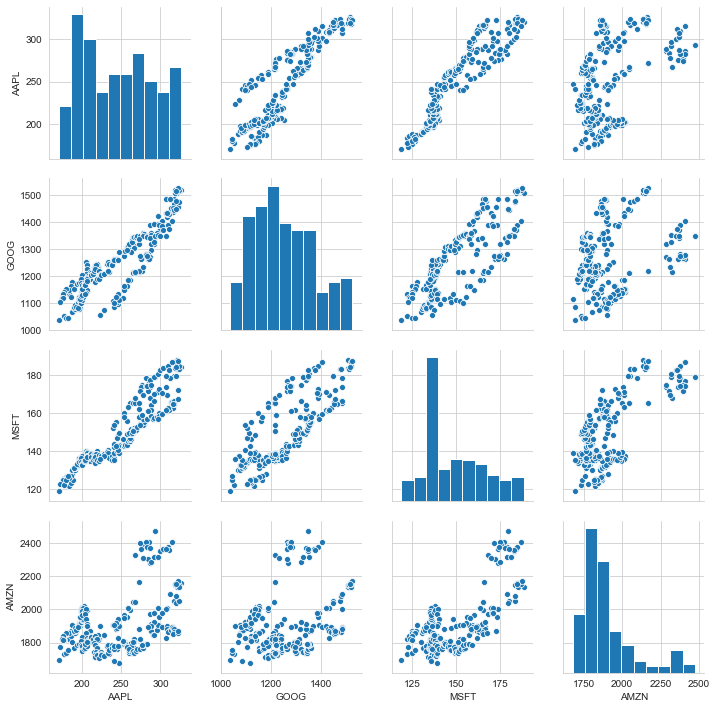

In [74]:
sns.pairplot(closing)

In [ ]:
#trying the correlation plots

In [ ]:
#copy pasted from seaborn site

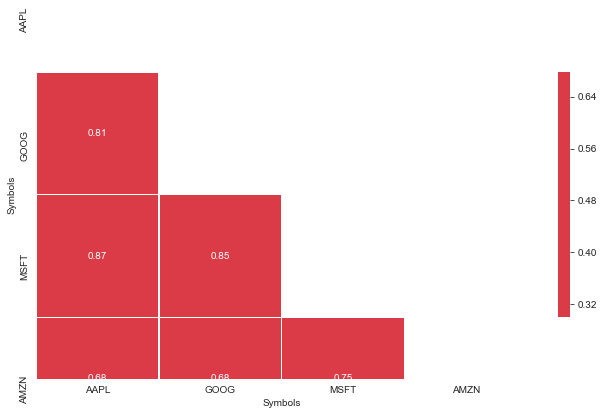

In [71]:
# Generate a large random dataset
rs = np.random.RandomState(33)


# Compute the correlation matrix
corr = closing_chg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

# RISK ANALYSIS

#There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

    COMPARING (MEAN OF DAILY RETURNS)i.e. expected return // WITH // (STDDEV OF DAILY RETURNS)i.e. risk

daily returns is percentage change of adj close

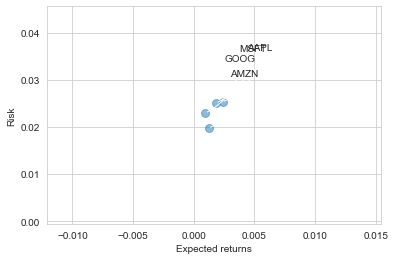

In [80]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
closing_chg = closing_chg.dropna()

area = np.pi*20

plt.scatter(closing_chg.mean(), closing_chg.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(closing_chg.columns, closing_chg.mean(), closing_chg.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

The thing to notice is that to choose stock with lower risk and higher expected return.